In [ ]:
import fastai
import torch
import numpy as np


In [ ]:
from fastai.vision.all import*
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [ ]:
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

#data loading

dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames = get_image_files(path/'images'),
                                              label_func= label_getter, codes = np.loadtxt(path/'codes.txt', dtype=str ))


#fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

epoch,train_loss,valid_loss,time
0,2.858595,2.505816,00:01


epoch,train_loss,valid_loss,time
0,1.752259,1.396891,00:01
1,1.530015,1.296538,00:01
2,1.428276,1.435188,00:02
3,1.404763,1.016574,00:02
4,1.299149,0.898672,00:02
5,1.190879,0.790317,00:02
6,1.085914,0.711573,00:01
7,0.994599,0.692962,00:02
8,0.918536,0.646253,00:03
9,0.851117,0.637673,00:01


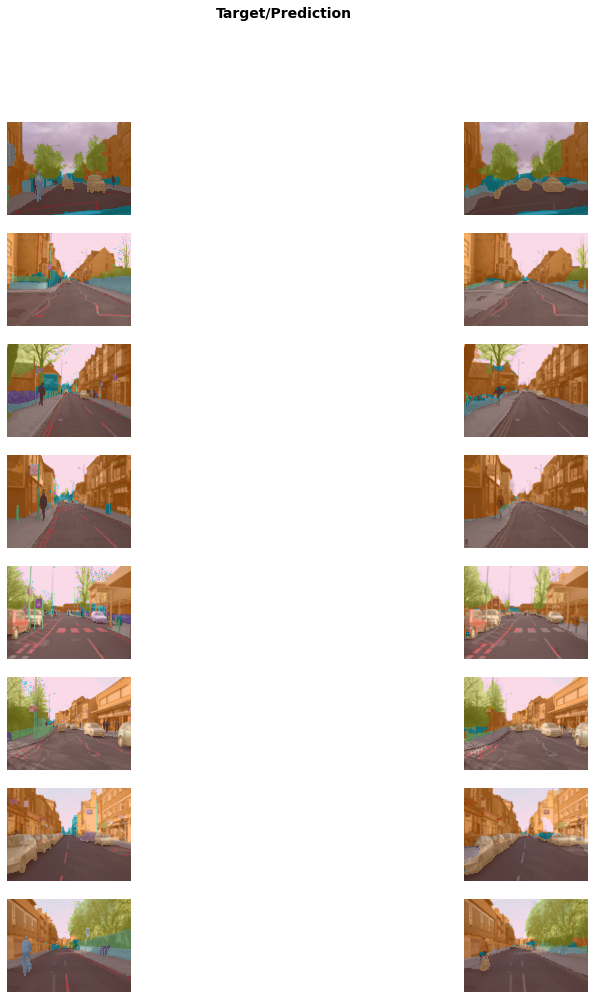

In [ ]:
learn.show_results(max_n=10, figsize=(15,16))